In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
covid=pd.read_csv('covid_19_india.csv',parse_dates=['Date'],dayfirst=True)

In [3]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


In [5]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [6]:
covid=covid[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]
covid.columns=['date','state','cured','deaths','confirmed']

In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       18110 non-null  datetime64[ns]
 1   state      18110 non-null  object        
 2   cured      18110 non-null  int64         
 3   deaths     18110 non-null  int64         
 4   confirmed  18110 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 707.5+ KB


In [8]:
covid.tail()['date']

18105   2021-08-11
18106   2021-08-11
18107   2021-08-11
18108   2021-08-11
18109   2021-08-11
Name: date, dtype: datetime64[ns]

In [9]:
today=covid[covid['date']=='2021-08-11']

In [10]:
today.head()

,date,state,cured,deaths,confirmed
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18076,2021-08-11,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,Assam,559684,5420,576149
18078,2021-08-11,Bihar,715352,9646,725279


In [11]:
max_confirmed_cases=today.sort_values(by='confirmed',ascending=False)

In [12]:
max_confirmed_cases.head()

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


In [13]:
top_states_confirmed=max_confirmed_cases[:5]

In [14]:
top_states_confirmed

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


In [15]:
sns.set(style='darkgrid',rc={'figure.figsize':(12,7)})

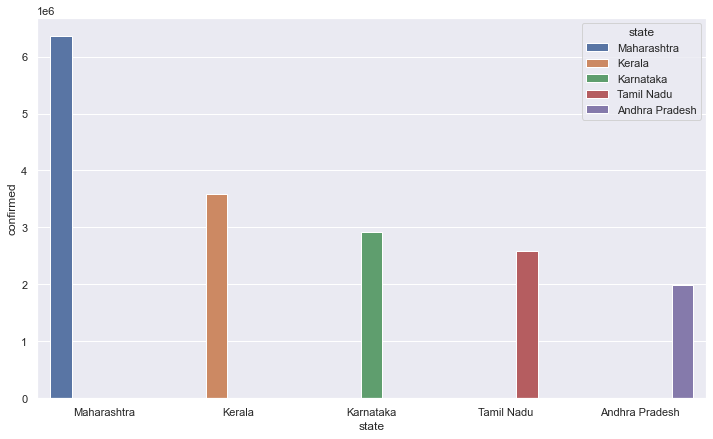

In [16]:
sns.barplot(x='state',y='confirmed',data=top_states_confirmed,hue='state')
plt.show()

In [17]:
max_death_cases=today.sort_values(by='deaths',ascending=False)

In [18]:
top_states_deaths=max_death_cases[:5]

<AxesSubplot:xlabel='state', ylabel='deaths'>

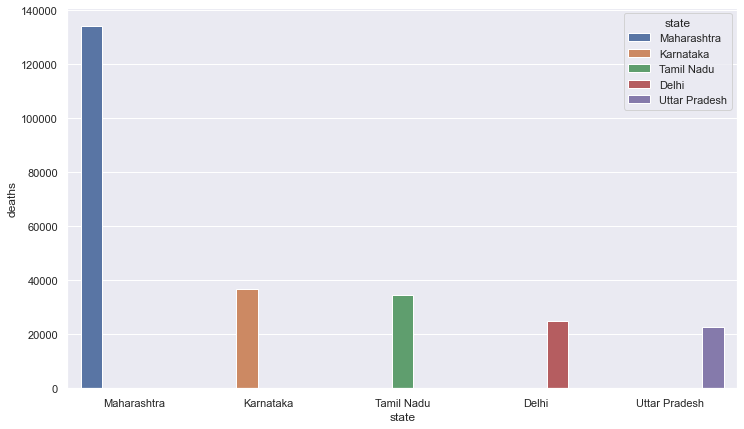

In [19]:
sns.barplot(x='state',y='deaths',data=top_states_deaths,hue='state')

In [20]:
max_cured_cases=today.sort_values(by='cured',ascending=False)

In [21]:
top_states_cured=max_cured_cases[:5]

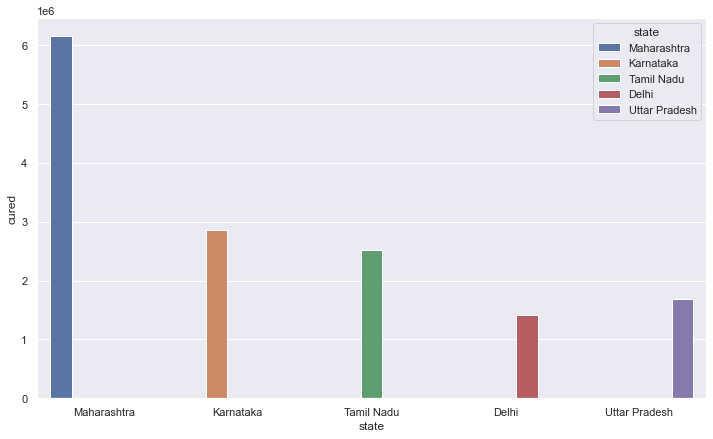

In [22]:
sns.barplot(x='state',y='cured',data=top_states_deaths,hue='state')
plt.show()

In [23]:
maha=covid[covid['state']=='Maharashtra']

In [24]:
maha.head()

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14


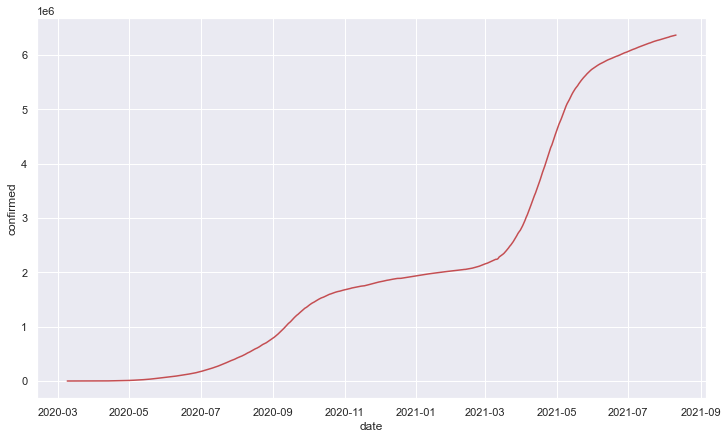

In [25]:
sns.lineplot(x='date',y='confirmed',data=maha,color='r')
plt.show()

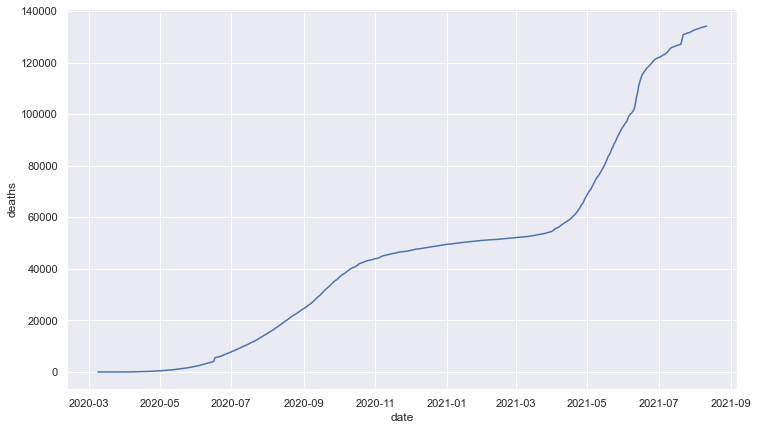

In [26]:
sns.lineplot(x='date',y='deaths',data=maha,color='b')
plt.show()

In [27]:
kerala=covid[covid['state']=='Kerala']

In [28]:
kerala.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


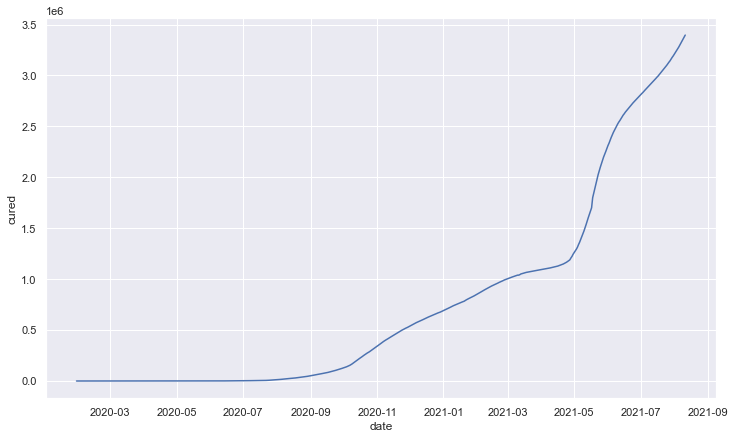

In [29]:
sns.lineplot(x='date',y='cured',data=kerala,color='b')
plt.show()

In [33]:
maha.head()
maha['date']=maha['date'].map(dt.datetime.toordinal)
maha.head()

TypeError: descriptor 'toordinal' for 'datetime.date' objects doesn't apply to a 'int' object

In [42]:
x=maha['date']
y=maha['confirmed']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [44]:
lr=LinearRegression()

In [47]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [48]:
type(y_test)

pandas.core.series.Series

In [51]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [52]:
mean_squared_error(y_test,y_pred)

540062119441.1122